In [2]:
import pandas as pd
import numpy as np

In [7]:
import os

#current_dir = os.path.dirname(os.path.abspath(__file__))
#parent_dir = os.path.dirname(current_dir)
#relative_path = os.path.join('datasets', 'diamonds','diamonds.csv')
#absolute_path = os.path.join(parent_dir, relative_path)

data = pd.read_csv('../datasets/diamonds/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [8]:
print(data.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [9]:
cath_columns = list(data.select_dtypes(include=[object]).columns)
print(cath_columns)
num_columns = list(data.select_dtypes(exclude=[object]).columns)
print(num_columns)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [10]:
for col in cath_columns:
  print(col+": ", end= "")
  print(data[col].unique())

cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color: ['H' 'I' 'F' 'G' 'E' 'D' 'J']
clarity: ['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


In [11]:
data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


In [12]:
data[data['price']<=0].count()

carat      10
cut        10
color      10
clarity    10
depth      10
table      10
price      10
x          10
y          10
z          10
dtype: int64

In [13]:
len(data[(data['z']>0) & (data['price']>0)]), len(data)

(4989, 5000)

In [14]:
data2 = data[(data['z']>0) & (data['price']>0)].reset_index(drop= True)
data2.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,Ideal,H,VVS1,61.2,57.0,655,4.30,4.39,2.66


In [15]:
ordered_cathegories = [['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'],
                      ['D', 'E', 'F', 'G', 'H', 'I', 'J'], ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1' ]]

<Axes: xlabel='cut', ylabel='price'>

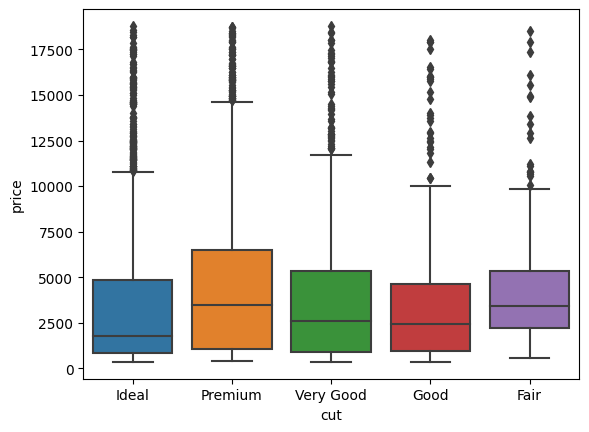

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot( x = 'cut',y = 'price', data = data2, order=ordered_cathegories[0])

<Axes: xlabel='color', ylabel='price'>

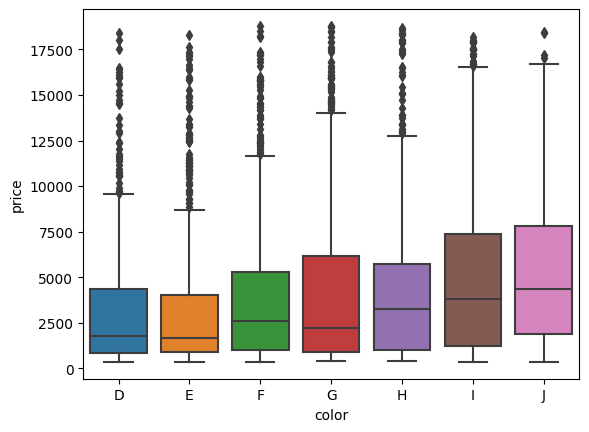

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot( x = 'color',y = 'price', data = data2, order= ordered_cathegories[1])

<Axes: xlabel='clarity', ylabel='price'>

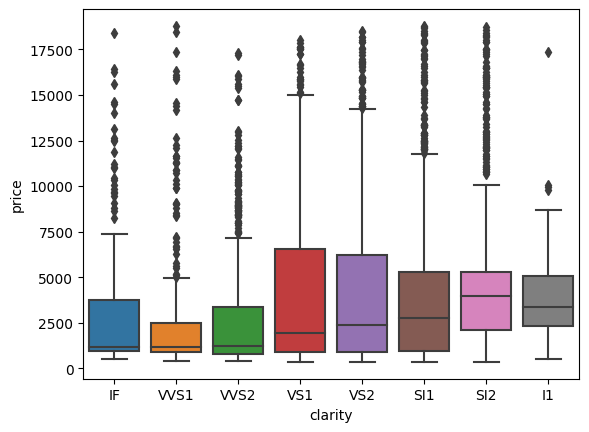

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot( x = 'clarity',y = 'price', data = data2, order= ordered_cathegories[2])

In [20]:
data2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [21]:
cath_columns

['cut', 'color', 'clarity']

In [22]:
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import LabelEncoder

myenc = OrdinalEncoder(categories = ordered_cathegories)
#myenc = OrdinalEncoder()

#myenc = {}
#for column in cath_columns:
#  myenc[column] = LabelEncoder()
#
#  data2[column] = myenc[column].fit_transform(data2[column])

myenc.fit(data2[cath_columns])

data2[cath_columns] = myenc.transform(X=data2[cath_columns])#, columns = cath_columns)
#data2[cath_columns] = pd.DataFrame(myenc.transform(X=data2[cath_columns]), columns = cath_columns)


In [25]:
data2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,0.0,4.0,6.0,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,0.0,4.0,5.0,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,1.0,5.0,5.0,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,0.0,2.0,5.0,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,2.0,2.0,4.0,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4984,0.38,0.0,4.0,2.0,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,1.0,3.0,2.0,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,0.0,6.0,2.0,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,1.0,2.0,4.0,62.9,58.0,802,4.31,4.27,2.70


<Axes: >

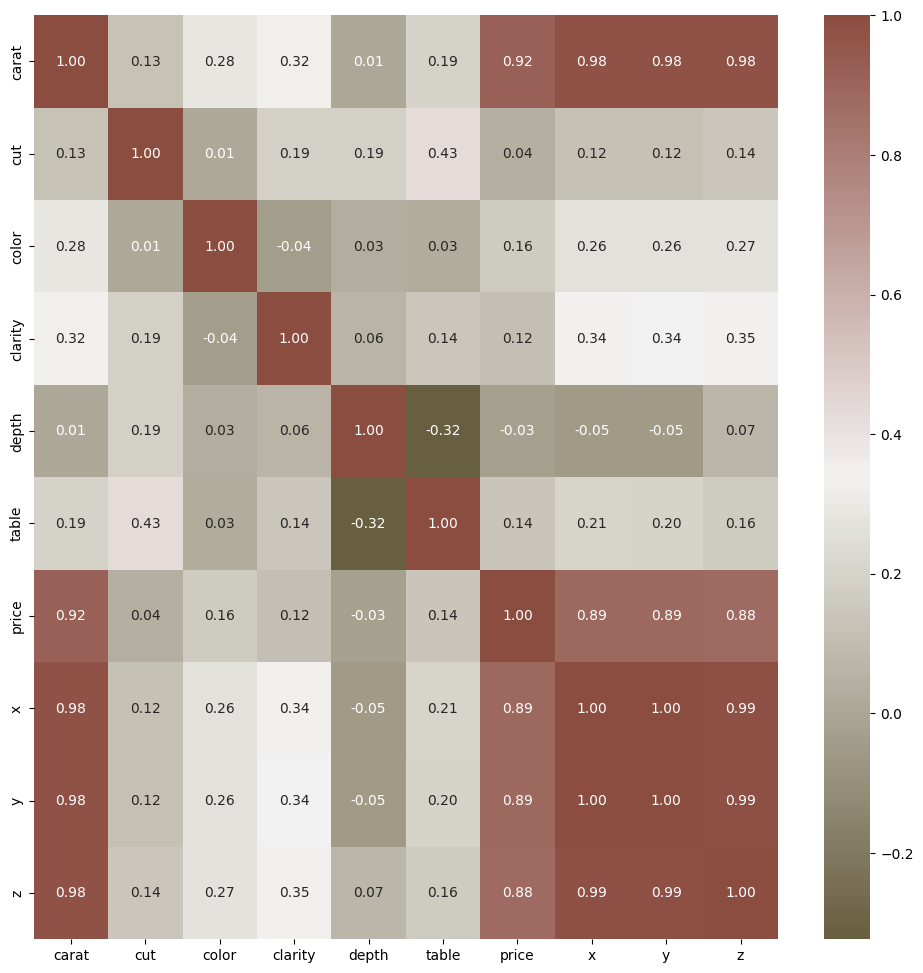

In [26]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
#corrmat= data2.corr()
corrmat= data2.corr()
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corrmat,cmap=cmap,annot=True, fmt='.2f', cbar=True)

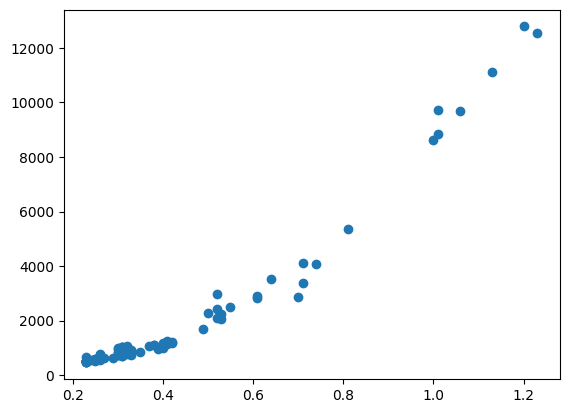

In [30]:
X_ = data2[(data2['color']==1)&(data2['clarity']==2)]['carat']
Y_ = data2[(data2['color']==1)&(data2['clarity']==2)]['price']
plt.scatter(X_, Y_)

In [40]:
X = (4/3)*np.pi*(data2['x']/2)*(data2['y']/2)*(data2['z']/2)/(data2['carat']*57.14)
X.describe()

count    4989.000000
mean        1.496713
std         0.038239
min         0.483630
25%         1.480614
50%         1.498549
75%         1.515042
max         2.955474
dtype: float64

<Axes: ylabel='Count'>

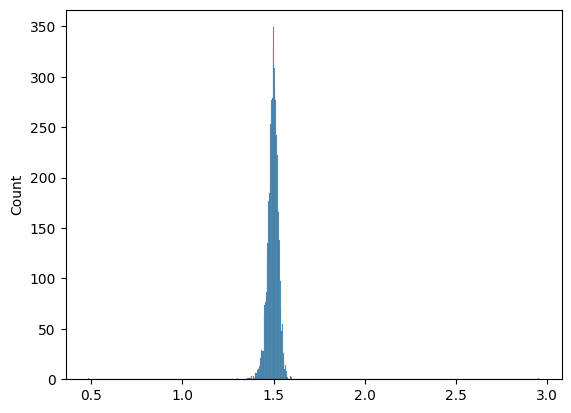

In [41]:
sns.histplot(X)

In [42]:
Y = np.log(data2['price'])
Y.describe()

count    4989.000000
mean        7.783717
std         1.019371
min         5.860786
25%         6.848005
50%         7.782390
75%         8.589700
max         9.840920
Name: price, dtype: float64

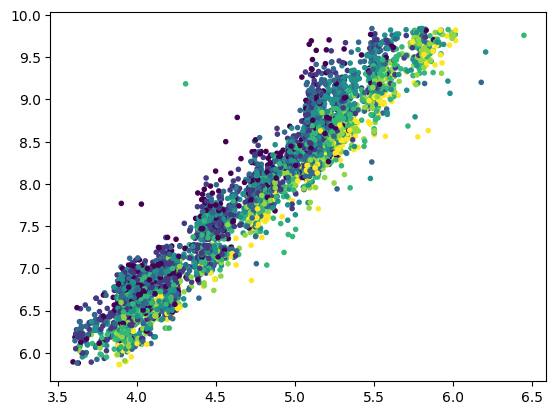

In [43]:
#plt.xlim(-1.9,-1.7)
plt.scatter(x= np.log(data2['x']*data2['y']*data2['z']/((data2['x']**2+data2['y']**2+data2['z']**2)**0)), y = np.log(data2['price']), c = data2['color'], marker = '.')

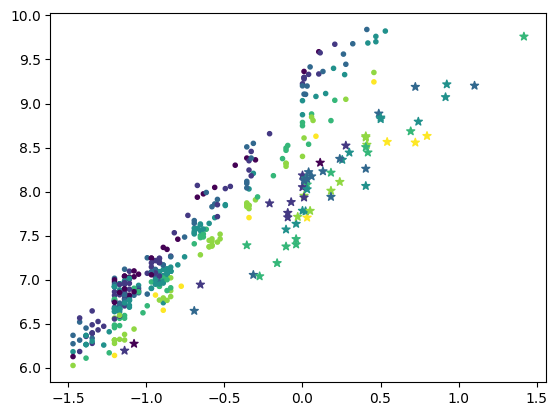

In [24]:
#plt.xlim(-1.9,-1.7)

data3= data2[data2['clarity']==7]
plt.scatter(x= np.log(data3['carat']), y = np.log(data3['price']), c = data3['color'], marker = '*')
data3= data2[data2['clarity']==1]
plt.scatter(x= np.log(data3['carat']), y = np.log(data3['price']), c = data3['color'], marker = '.')

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

target = data2['price']
data2_feat = data2.drop(['price'], axis=1)

selector = SelectKBest(f_classif, k=9)
data2_feat_best = selector.fit_transform(data2_feat, target)

In [45]:
selector.get_feature_names_out()

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'], dtype=object)

In [46]:
selector.scores_

array([63.06215686,  1.4234392 ,  1.64011066,  1.87652649,  1.37202157,
        1.18019317, 49.17928846, 49.85734984, 44.03367084])

In [47]:
selector.pvalues_

array([0.00000000e+00, 4.31515909e-17, 3.08302593e-31, 1.64639816e-48,
       4.00054558e-14, 4.01961296e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [48]:
selector.n_features_in_

9

In [49]:
selector.feature_names_in_

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'], dtype=object)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()
model.fit(np.log(data2[['carat']]), np.log(data2['price']))

LinearRegression()

In [52]:
model.coef_

array([1.68639778])

In [53]:
model.intercept_

8.456063610268204

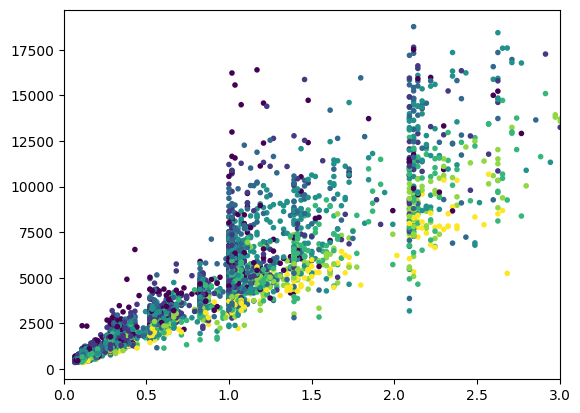

In [55]:
ax = plt.gca()
ax.set_xlim([0, 3])
#ax.set_ylim([5.5, 10])
#plt.scatter(x= data2['carat']**1.69, y = data2['price'], c = data2['color'], marker = '.')
plt.scatter(x= data2['carat']**1.82, y = data2['price'], c = data2['color'], marker = '.')